In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Third Harmonic:

In [196]:
TH_pulse_dataframe_xenon = pd.read_csv("1024_TH_pulse_dataframe_xenon.csv")

new_rows = []

# get the unique values of gases, pressures, and fiber lengths
gases = TH_pulse_dataframe_xenon['gas'].unique()
pressures = TH_pulse_dataframe_xenon['gas pressure'].unique()
fiber_lengths = TH_pulse_dataframe_xenon['fiber length'].unique()

# add rows for fiber length = 0
for gas in gases:
    for pressure in pressures:
        new_rows.append({
            "gas": gas,
            "gas pressure": pressure,
            "fiber length": 0,
            "pulse energy": 0,
            "pulse duration (FWHM)": 0,
            "pulse peak power": 0,
            "energy conversion efficiency": 0,
            "peak power conversion efficiency": 0
        })

# add rows for gas pressure = 0
for gas in gases:
    for fiber_length in fiber_lengths:
        new_rows.append({
            "gas": gas,
            "gas pressure": 0,  # Set pressure to 0
            "fiber length": fiber_length,
            "pulse energy": 0,  # Set signal to 0
            "pulse duration (FWHM)": 0,
            "pulse peak power": 0,
            "energy conversion efficiency": 0,
            "peak power conversion efficiency": 0
        })

new_rows_df = pd.DataFrame(new_rows)
TH_pulse_dataframe_xenon = pd.concat([new_rows_df, TH_pulse_dataframe_xenon], ignore_index=True, sort=False)
heatmap_TH_energy_xenon = TH_pulse_dataframe_xenon.pivot(index='gas pressure', columns='fiber length', values='pulse energy')

/var/folders/sj/b_4kbpj13tg_dm_f9vjc5sr80000gn/T/ipykernel_31696/300332781.py:32: RuntimeWarning: divide by zero encountered in divide
  y = product_pressure_length / x


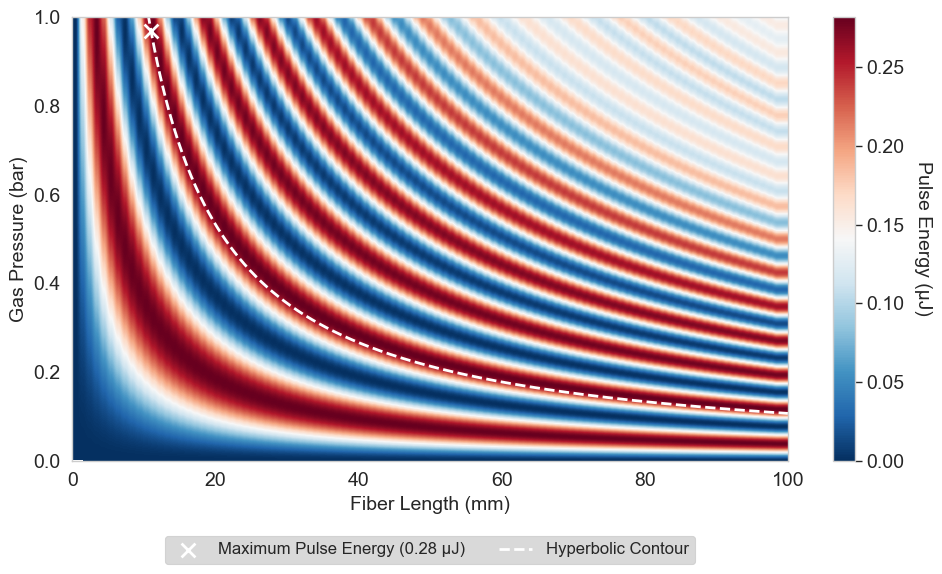

In [211]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# find the maximum pulse energy and its corresponding gas pressure and fiber length
max_pulse_energy = TH_pulse_dataframe_xenon['pulse energy'].max()
max_row = TH_pulse_dataframe_xenon[TH_pulse_dataframe_xenon['pulse energy'] == max_pulse_energy]

max_gas_pressure = max_row['gas pressure'].values[0]
max_fiber_length = max_row['fiber length'].values[0]

# calculate the product of gas pressure and fiber length
product_pressure_length = max_gas_pressure * max_fiber_length

plt.figure(figsize=(10, 6))

# multiply the heatmap data by 1e6 to convert to µJ
heatmap_scaled = heatmap_TH_energy_xenon * 1e6

plt.imshow(heatmap_scaled, aspect='auto', cmap='RdBu_r', origin='lower', 
           extent=[TH_pulse_dataframe_xenon['fiber length'].min(), 
                   TH_pulse_dataframe_xenon['fiber length'].max(), 
                   TH_pulse_dataframe_xenon['gas pressure'].min(), 
                   TH_pulse_dataframe_xenon['gas pressure'].max()])

cbar = plt.colorbar(label='Pulse Energy (µJ)', orientation='vertical')
cbar.set_label('Pulse Energy (µJ)', fontsize=14, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=14)

plt.scatter(max_fiber_length, max_gas_pressure, color='white', marker='x', s=100, linewidths=2, label=f'Maximum Pulse Energy ({max_pulse_energy*1e6:.2f} µJ)', zorder=10)

x = np.linspace(0, 100, 500)
y = product_pressure_length / x
plt.plot(x, y, color='white', linewidth=2, linestyle='--', label='Hyperbolic Contour')

plt.xlabel('Fiber Length (mm)', fontsize=14)
plt.ylabel('Gas Pressure (bar)', fontsize=14)
plt.xlim(0, 100)
plt.ylim(0, TH_pulse_dataframe_xenon['gas pressure'].max())

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

legend = plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
legend.get_frame().set_facecolor('#d0d0d0')

plt.grid(False)

plt.tight_layout()
plt.savefig("fig15.png")
plt.show()

In [198]:
max_conversion_eta = max_row['energy conversion efficiency'].values[0]
max_conversion_eta * 100

0.31290440245975

In [199]:
max_pulse_energy

2.820022191714732e-07

In [200]:
max_gas_pressure

0.968

In [201]:
fiber_len

11

In [202]:
product_pressure_length

10.648

In [203]:
max_fwhm = max_row['pulse duration (FWHM)'].values[0]
max_fwhm * 1e12

0.1286107177734375

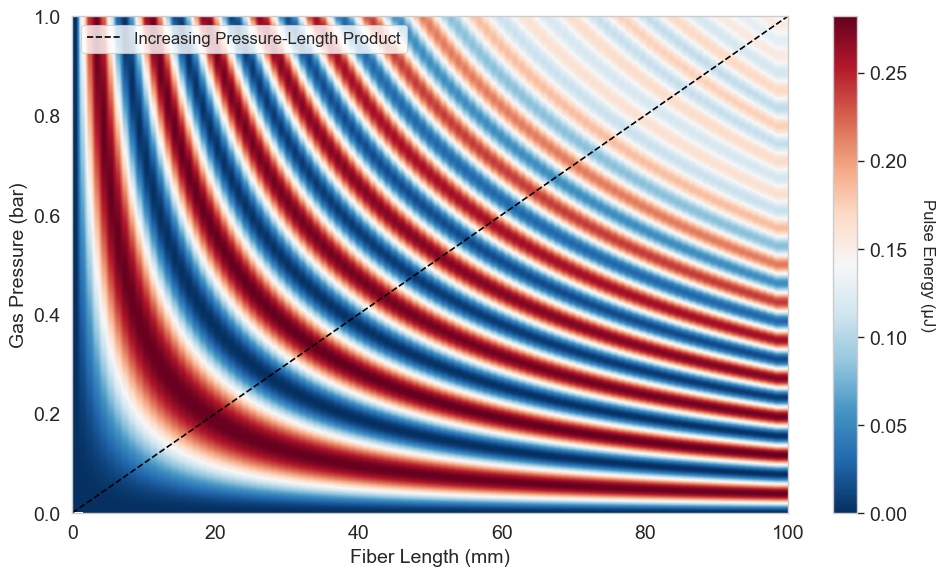

In [236]:
# define the constant pressure/length ratio
k = TH_pulse_dataframe_xenon['gas pressure'].max() / TH_pulse_dataframe_xenon['fiber length'].max()

heatmap_TH_energy_xenon = TH_pulse_dataframe_xenon.pivot(index='gas pressure', columns='fiber length', values='pulse energy')

# multiply the heatmap data by 1e6 to convert to µJ
heatmap_TH_energy_xenon_scaled = heatmap_TH_energy_xenon * 1e6

plt.figure(figsize=(10, 6))
heatmap_plot = plt.imshow(heatmap_TH_energy_xenon_scaled, aspect='auto', origin='lower', 
                          extent=[TH_pulse_dataframe_xenon['fiber length'].min(), 
                                  TH_pulse_dataframe_xenon['fiber length'].max(), 
                                  TH_pulse_dataframe_xenon['gas pressure'].min(), 
                                  TH_pulse_dataframe_xenon['gas pressure'].max()],
                          cmap='RdBu_r', norm=plt.Normalize(vmin=heatmap_TH_energy_xenon_scaled.min().min(), vmax=heatmap_TH_energy_xenon_scaled.max().max()))

product_values = np.linspace(
    TH_pulse_dataframe_xenon['gas pressure'].min() * TH_pulse_dataframe_xenon['fiber length'].min(),
    TH_pulse_dataframe_xenon['gas pressure'].max() * TH_pulse_dataframe_xenon['fiber length'].max(),
    100
)
fiber_lengths_product = np.sqrt(product_values / k)
pressures_product = np.sqrt(product_values * k)

plt.plot(fiber_lengths_product, pressures_product, 'k--', label='Increasing Pressure-Length Product')

plt.xlabel('Fiber Length (mm)', fontsize=14)
plt.ylabel('Gas Pressure (bar)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

cbar = plt.colorbar(heatmap_plot)
cbar.set_label('Pulse Energy (µJ)', fontsize=12, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=14)

plt.legend(fontsize=12)

plt.tight_layout()
plt.grid(False)

plt.savefig("fig16a.png")
plt.show()

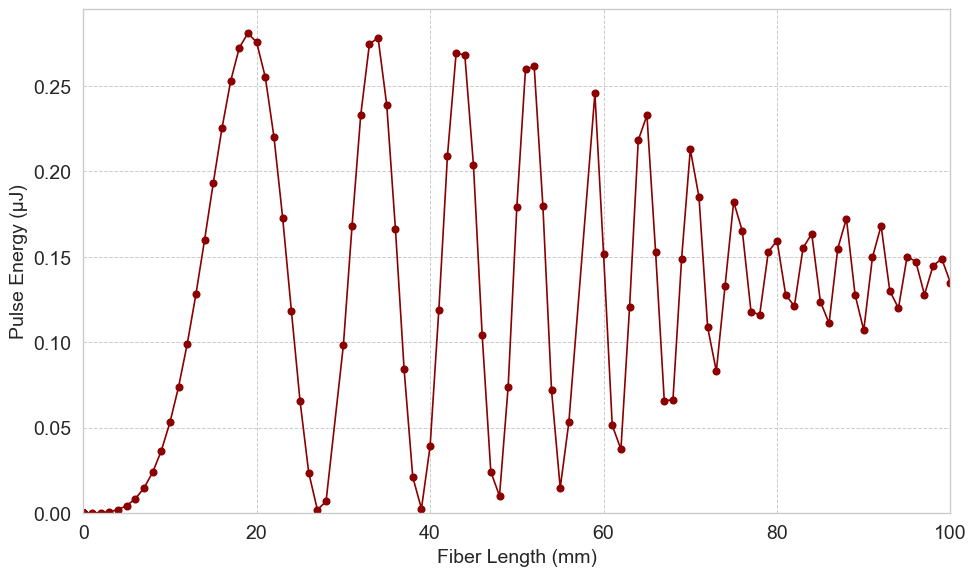

In [214]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# define a constant pressure/length ratio
ratio = TH_pulse_dataframe_xenon['gas pressure'].max() / TH_pulse_dataframe_xenon['fiber length'].max()

diagonal_data = TH_pulse_dataframe_xenon[
    (TH_pulse_dataframe_xenon['fiber length'] == 0) | 
    (TH_pulse_dataframe_xenon['gas pressure'] / TH_pulse_dataframe_xenon['fiber length'] == ratio)
]

plt.figure(figsize=(10, 6))

plt.plot(diagonal_data['fiber length'], diagonal_data['pulse energy']*1e6, 
         marker='o', linestyle='-', color='darkred', label='Pulse Energy')

plt.xlabel('Fiber Length (mm)', fontsize=14)
plt.ylabel('Pulse Energy (µJ)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim([0, 100])
plt.ylim([0, None])

plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

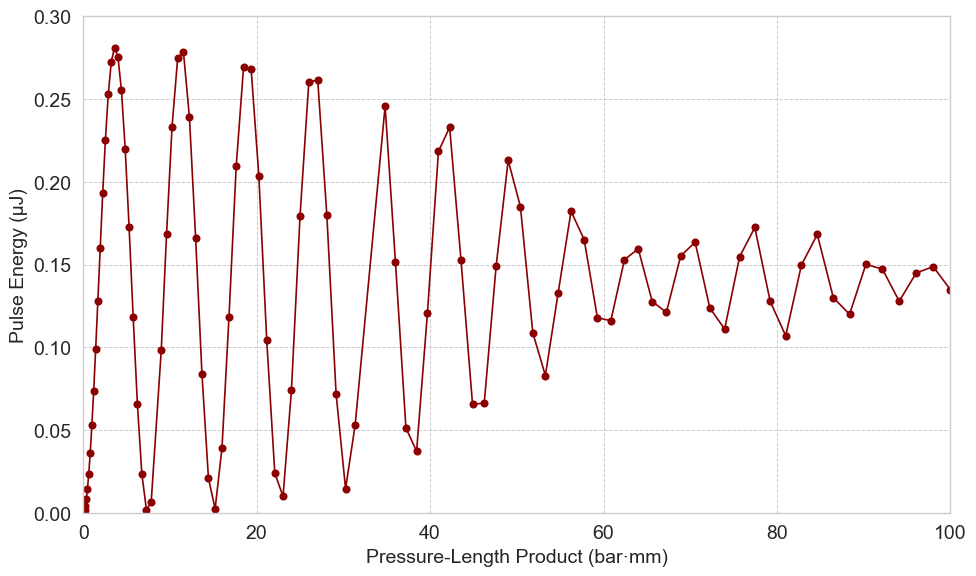

In [254]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# define a constant pressure/length ratio
ratio = TH_pulse_dataframe_xenon['gas pressure'].max() / TH_pulse_dataframe_xenon['fiber length'].max()

TH_pulse_dataframe_xenon['pressure_length_product'] = TH_pulse_dataframe_xenon['gas pressure'] * TH_pulse_dataframe_xenon['fiber length']

diagonal_data = TH_pulse_dataframe_xenon[(TH_pulse_dataframe_xenon['fiber length'] == 0) | 
                                         (TH_pulse_dataframe_xenon['gas pressure'] / TH_pulse_dataframe_xenon['fiber length'] == ratio)]

plt.figure(figsize=(10, 6))
plt.plot(diagonal_data['pressure_length_product'], diagonal_data['pulse energy'] * 1e6, 
         marker='o', linestyle='-', color='darkred')

plt.xlabel('Pressure-Length Product (bar·mm)', fontsize=14)
plt.ylabel('Pulse Energy (µJ)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim([0, 100])
plt.ylim([0, 0.3])

plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.savefig("fig16b.png")
plt.show()

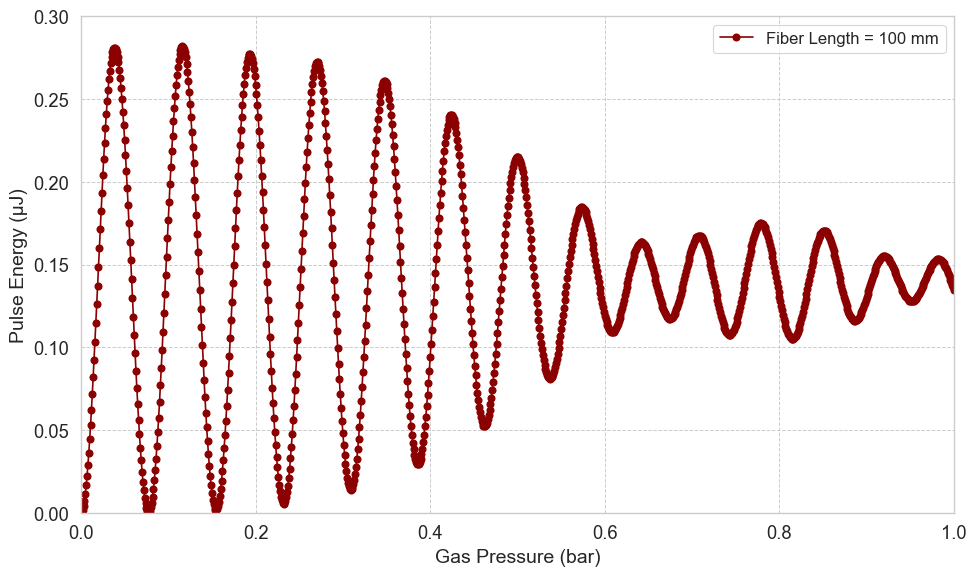

In [253]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# filter data for the specific fiber length
fiber_length_value = 100
filtered_data = TH_pulse_dataframe_xenon[TH_pulse_dataframe_xenon['fiber length'] == fiber_length_value]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['gas pressure'], filtered_data['pulse energy'] * 1e6, 
         marker='o', linestyle='-', color='darkred', label=f'Fiber Length = {fiber_length_value} mm')

plt.xlabel('Gas Pressure (bar)', fontsize=14)
plt.ylabel('Pulse Energy (µJ)', fontsize=14)

# Step 4: Add grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.xlim([0, 1])
plt.ylim([0, 0.3])

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

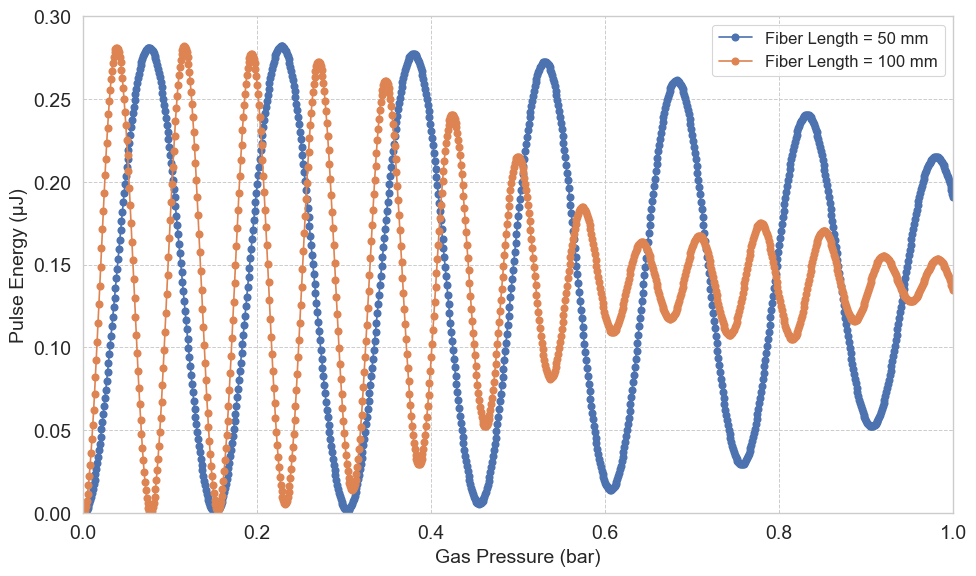

In [257]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

fiber_lengths = [50, 100]

colors = sns.color_palette("deep", len(fiber_lengths))

plt.figure(figsize=(10, 6))
for i, fiber_length_value in enumerate(fiber_lengths):
    filtered_data = TH_pulse_dataframe_xenon[TH_pulse_dataframe_xenon['fiber length'] == fiber_length_value]
    plt.plot(filtered_data['gas pressure'], filtered_data['pulse energy'] * 1e6, 
             marker='o', linestyle='-', color=colors[i], 
             label=f'Fiber Length = {fiber_length_value} mm')

plt.xlabel('Gas Pressure (bar)', fontsize=14)
plt.ylabel('Pulse Energy (µJ)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlim([0, 1])
plt.ylim([0, 0.3])

plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig("fig17.png")

plt.show()

/var/folders/sj/b_4kbpj13tg_dm_f9vjc5sr80000gn/T/ipykernel_31696/3547483176.py:12: RuntimeWarning: divide by zero encountered in divide
  y = product_pressure_length / x  # Hyperbolic relation between fiber length and gas pressure


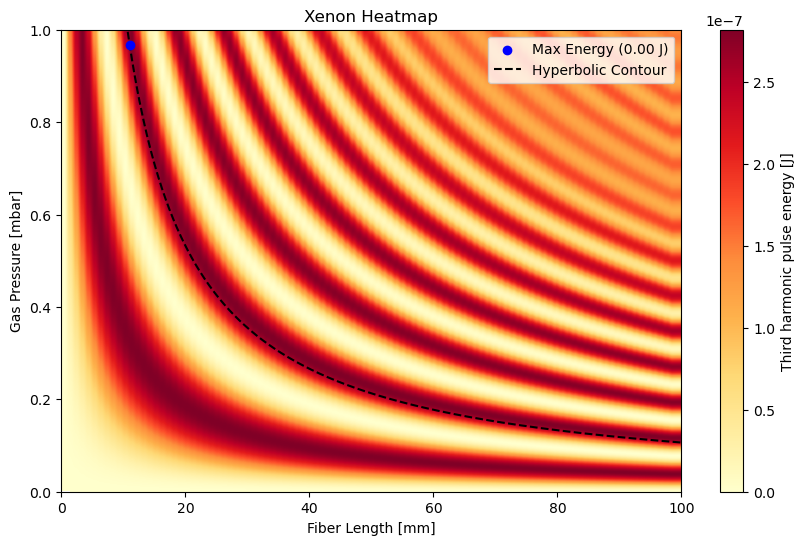

In [30]:
# Find the maximum pulse energy and its corresponding gas pressure and fiber length
max_pulse_energy = TH_pulse_dataframe_xenon['pulse energy'].max()
max_row = TH_pulse_dataframe_xenon[TH_pulse_dataframe_xenon['pulse energy'] == max_pulse_energy]

# Extract corresponding gas pressure and fiber length for maximum energy
max_gas_pressure = max_row['gas pressure'].values[0]
max_fiber_length = max_row['fiber length'].values[0]

# Calculate the product of gas pressure and fiber length
product_pressure_length = max_gas_pressure * max_fiber_length

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_TH_energy_xenon, aspect='auto', cmap='YlOrRd', origin='lower', extent=[0, 100, 0, heatmap_TH_energy_xenon.index.max()])
plt.colorbar(label='Third harmonic pulse energy [J]')
plt.title('Xenon Heatmap')

# Mark the maximum pulse energy point
plt.scatter(max_fiber_length, max_gas_pressure, color='blue', label=f'Max Energy ({max_pulse_energy:.2f} J)', zorder=10)

# Hyperbolic contour
x = np.linspace(0, 100, 500)  # Fiber length values
y = product_pressure_length / x  # Hyperbolic relation between fiber length and gas pressure
plt.plot(x, y, color='black', linestyle='--', label='Hyperbolic Contour')

# Labels
plt.xlabel('Fiber Length [mm]')
plt.ylabel('Gas Pressure [mbar]')
plt.xlim(0, 100)
plt.ylim(0, heatmap_TH_energy_xenon.index.max())
plt.legend()
plt.show()

/var/folders/sj/b_4kbpj13tg_dm_f9vjc5sr80000gn/T/ipykernel_31696/516270905.py:23: RuntimeWarning: divide by zero encountered in divide
  y = product_pressure_length / x  # Hyperbolic relation between fiber length and gas pressure


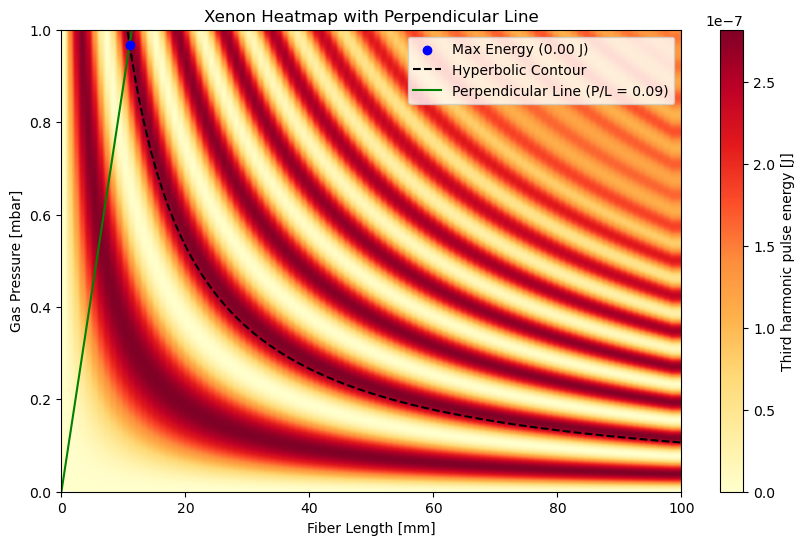

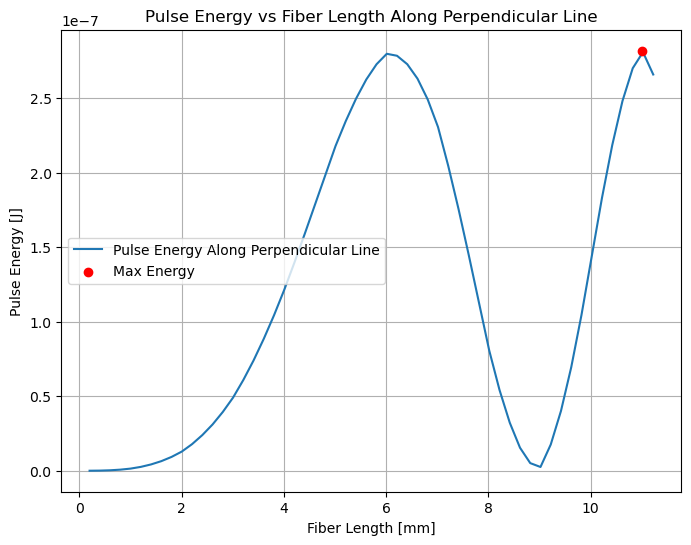

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constant ratio for the line perpendicular to the hyperbolic contours
# Let's choose a ratio based on the maximum pressure and fiber length
ratio_perpendicular = max_gas_pressure / max_fiber_length

# Define the fiber length and gas pressure for the perpendicular line
fiber_lengths = np.linspace(0, 100, 500)  # Fiber length values
gas_pressures_perpendicular = ratio_perpendicular * fiber_lengths  # Gas pressure values along the perpendicular line

# Plot the heatmap with the hyperbolic contours
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_TH_energy_xenon, aspect='auto', cmap='YlOrRd', origin='lower', extent=[0, 100, 0, heatmap_TH_energy_xenon.index.max()])
plt.colorbar(label='Third harmonic pulse energy [J]')
plt.title('Xenon Heatmap with Perpendicular Line')

# Mark the maximum pulse energy point
plt.scatter(max_fiber_length, max_gas_pressure, color='blue', label=f'Max Energy ({max_pulse_energy:.2f} J)', zorder=10)

# Plot the hyperbolic contour
x = np.linspace(0, 100, 500)  # Fiber length values for the hyperbolic contour
y = product_pressure_length / x  # Hyperbolic relation between fiber length and gas pressure
plt.plot(x, y, color='black', linestyle='--', label='Hyperbolic Contour')

# Plot the line perpendicular to the hyperbolic contours
plt.plot(fiber_lengths, gas_pressures_perpendicular, color='green', linestyle='-', label=f'Perpendicular Line (P/L = {ratio_perpendicular:.2f})')

# Labels
plt.xlabel('Fiber Length [mm]')
plt.ylabel('Gas Pressure [mbar]')
plt.xlim(0, 100)
plt.ylim(0, heatmap_TH_energy_xenon.index.max())
plt.legend()
plt.show()

# Step 4: Extract the pulse energy along the perpendicular line
# We can do this by interpolating or finding the nearest neighbors along the fiber length and gas pressure
from scipy.interpolate import griddata

# Create a grid for the fiber length and gas pressure
grid_fiber_length, grid_gas_pressure = np.meshgrid(TH_pulse_dataframe_xenon['fiber length'].unique(), TH_pulse_dataframe_xenon['gas pressure'].unique())
grid_pulse_energy = heatmap_TH_energy_xenon.values

# Interpolate the pulse energy along the perpendicular line
pulse_energies_perpendicular = griddata(
    (grid_fiber_length.flatten(), grid_gas_pressure.flatten()),
    grid_pulse_energy.flatten(),
    (fiber_lengths, gas_pressures_perpendicular),
    method='linear'
)

# Step 5: Plot the pulse energy along the perpendicular line
plt.figure(figsize=(8, 6))
plt.plot(fiber_lengths, pulse_energies_perpendicular, label='Pulse Energy Along Perpendicular Line')
plt.scatter(max_fiber_length, max_pulse_energy, color='red', label='Max Energy', zorder=10)
plt.title('Pulse Energy vs Fiber Length Along Perpendicular Line')
plt.xlabel('Fiber Length [mm]')
plt.ylabel('Pulse Energy [J]')
plt.legend()
plt.grid(True)
plt.show()

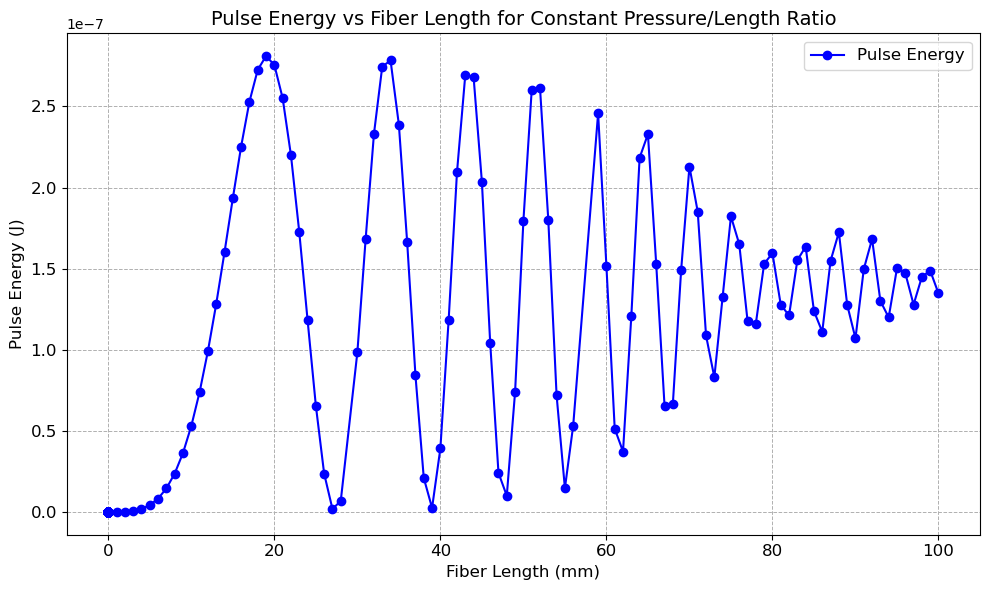

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named TH_pulse_dataframe_xenon

# Step 1: Define a constant pressure/length ratio
ratio = TH_pulse_dataframe_xenon['gas pressure'].max() / TH_pulse_dataframe_xenon['fiber length'].max()

# Step 2: Extract data along this ratio
# Explicitly include the case where fiber length is 0
diagonal_data = TH_pulse_dataframe_xenon[
    (TH_pulse_dataframe_xenon['fiber length'] == 0) | 
    (TH_pulse_dataframe_xenon['gas pressure'] / TH_pulse_dataframe_xenon['fiber length'] == ratio)
]

# Step 3: Create a professional-looking plot for a scientific paper
plt.figure(figsize=(10, 6))

# Customize the plot for professional appearance
plt.plot(diagonal_data['fiber length'], diagonal_data['pulse energy'], marker='o', linestyle='-', color='b', label='Pulse Energy')
plt.title('Pulse Energy vs Fiber Length for Constant Pressure/Length Ratio', fontsize=14)
plt.xlabel('Fiber Length (mm)', fontsize=12)
plt.ylabel('Pulse Energy (J)', fontsize=12)

# Add grid, axis labels, and customize ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()  # Ensures the layout is clean and not cramped
plt.show()

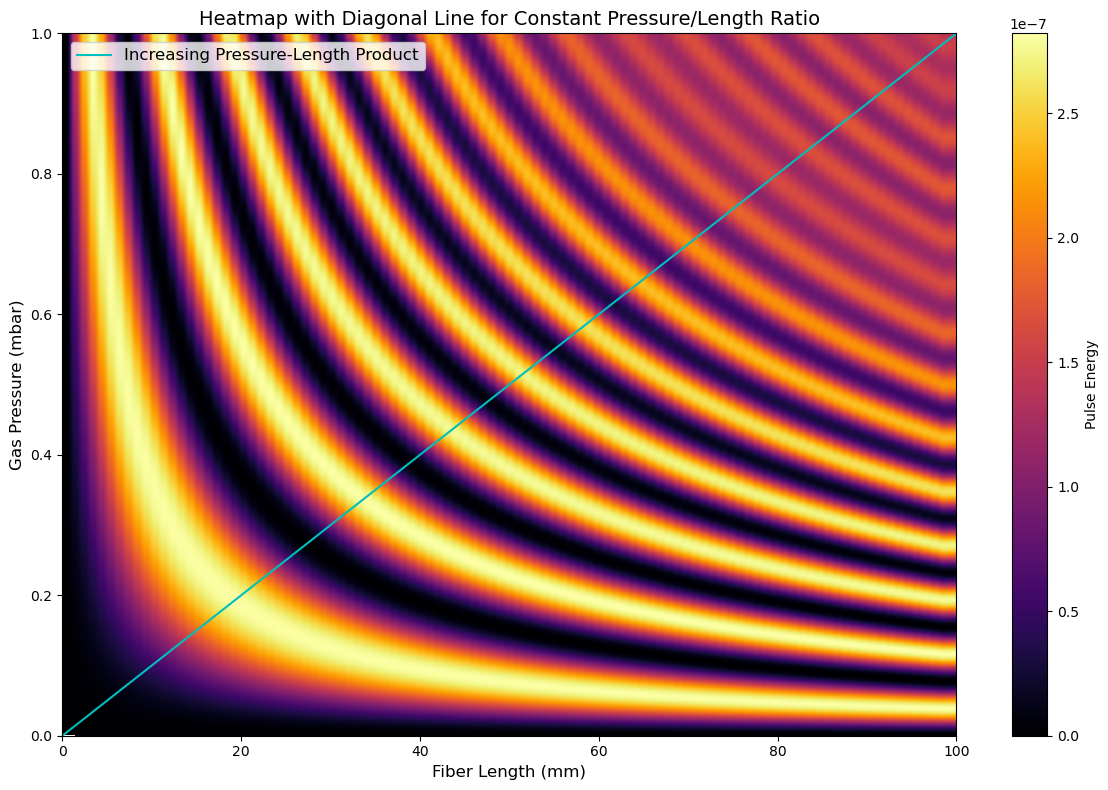

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame is TH_pulse_dataframe_xenon

# Step 1: Define the constant pressure/length ratio
k = TH_pulse_dataframe_xenon['gas pressure'].max() / TH_pulse_dataframe_xenon['fiber length'].max()

# Step 2: Create a pivot table for the heatmap (gas pressure vs fiber length, pulse energy as values)
heatmap_TH_energy_xenon = TH_pulse_dataframe_xenon.pivot(index='gas pressure', columns='fiber length', values='pulse energy')

# Step 3: Plot the heatmap using plt.imshow
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_TH_energy_xenon, aspect='auto', origin='lower', 
           extent=[TH_pulse_dataframe_xenon['fiber length'].min(), 
                   TH_pulse_dataframe_xenon['fiber length'].max(), 
                   TH_pulse_dataframe_xenon['gas pressure'].min(), 
                   TH_pulse_dataframe_xenon['gas pressure'].max()],
           cmap='inferno')
plt.colorbar(label='Pulse Energy')

# Step 4: Plot the diagonal line (constant pressure/length ratio)
# Calculate the product of pressure and fiber length over a range of values
product_values = np.linspace(
    TH_pulse_dataframe_xenon['gas pressure'].min() * TH_pulse_dataframe_xenon['fiber length'].min(),
    TH_pulse_dataframe_xenon['gas pressure'].max() * TH_pulse_dataframe_xenon['fiber length'].max(),
    100
)

# Calculate fiber lengths and pressures along the diagonal line
fiber_lengths_product = np.sqrt(product_values / k)  # fiber_length = sqrt(product / ratio)
pressures_product = np.sqrt(product_values * k)  # pressure = sqrt(product * ratio)

# Step 5: Plot the diagonal line on the heatmap
plt.plot(fiber_lengths_product, pressures_product, 'c-', label='Increasing Pressure-Length Product')

# Step 6: Final plot adjustments
plt.title('Heatmap with Diagonal Line for Constant Pressure/Length Ratio', fontsize=14)
plt.xlabel('Fiber Length (mm)', fontsize=12)
plt.ylabel('Gas Pressure (mbar)', fontsize=12)
plt.legend(fontsize=12)
# plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


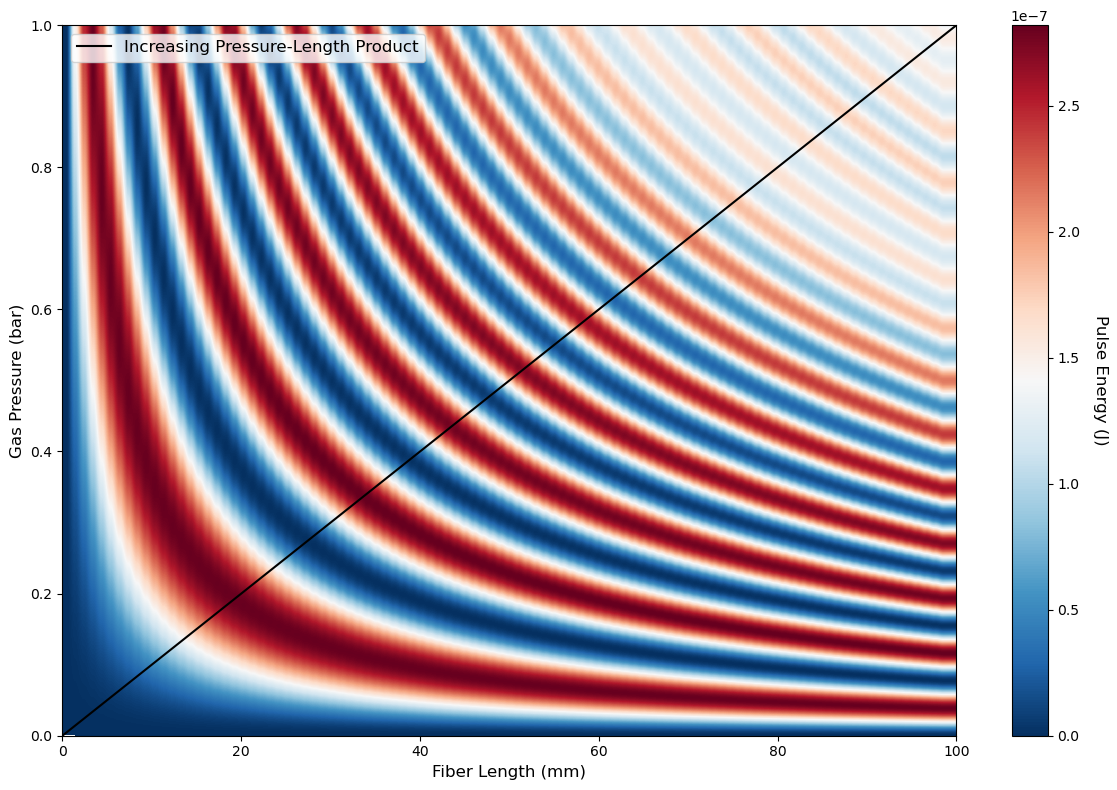

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is TH_pulse_dataframe_xenon

# Step 1: Define the constant pressure/length ratio
k = TH_pulse_dataframe_xenon['gas pressure'].max() / TH_pulse_dataframe_xenon['fiber length'].max()

# Step 2: Create a pivot table for the heatmap
heatmap_TH_energy_xenon = TH_pulse_dataframe_xenon.pivot(index='gas pressure', columns='fiber length', values='pulse energy')

# Step 3: Plot the heatmap using plt.imshow with a new color scheme (similar to the one in the image)
plt.figure(figsize=(12, 8))
heatmap_plot = plt.imshow(heatmap_TH_energy_xenon, aspect='auto', origin='lower', 
                          extent=[TH_pulse_dataframe_xenon['fiber length'].min(), 
                                  TH_pulse_dataframe_xenon['fiber length'].max(), 
                                  TH_pulse_dataframe_xenon['gas pressure'].min(), 
                                  TH_pulse_dataframe_xenon['gas pressure'].max()],
                          cmap='RdBu_r', norm=plt.Normalize(vmin=heatmap_TH_energy_xenon.min().min(), vmax=heatmap_TH_energy_xenon.max().max()))

# Step 4: Plot the diagonal line (constant pressure/length ratio)
product_values = np.linspace(
    TH_pulse_dataframe_xenon['gas pressure'].min() * TH_pulse_dataframe_xenon['fiber length'].min(),
    TH_pulse_dataframe_xenon['gas pressure'].max() * TH_pulse_dataframe_xenon['fiber length'].max(),
    100
)
fiber_lengths_product = np.sqrt(product_values / k)
pressures_product = np.sqrt(product_values * k)

# Step 5: Plot the diagonal line on the heatmap
plt.plot(fiber_lengths_product, pressures_product, 'k-', label='Increasing Pressure-Length Product')

# Labels
plt.xlabel('Fiber Length (mm)', fontsize=14)
plt.ylabel('Gas Pressure (bar)', fontsize=14)

# Step 6: Add a vertical color bar
cbar = plt.colorbar(heatmap_plot)
cbar.set_label('Pulse Energy (J)', fontsize=12, rotation=270, labelpad=20)  # Rotate the label to face left (270 degrees)

# Legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

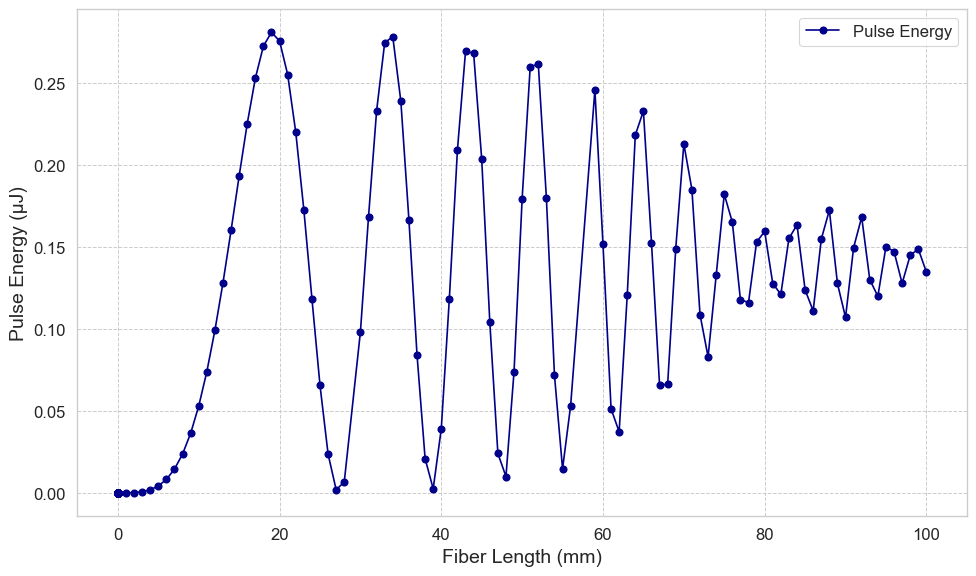

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named TH_pulse_dataframe_xenon

# Step 1: Define a constant pressure/length ratio
ratio = TH_pulse_dataframe_xenon['gas pressure'].max() / TH_pulse_dataframe_xenon['fiber length'].max()

# Step 2: Extract data along this ratio
# Explicitly include the case where fiber length is 0
diagonal_data = TH_pulse_dataframe_xenon[
    (TH_pulse_dataframe_xenon['fiber length'] == 0) | 
    (TH_pulse_dataframe_xenon['gas pressure'] / TH_pulse_dataframe_xenon['fiber length'] == ratio)
]

# Step 3: Create a professional-looking plot for a scientific paper
plt.figure(figsize=(10, 6))

# Customize the plot for professional appearance using Seaborn's color palette
sns.set_style("whitegrid")  # Use a clean grid style
sns.set_context("paper", font_scale=1.5)  # Context optimized for scientific papers

# Plot the data with a dark blue color
plt.plot(diagonal_data['fiber length'], diagonal_data['pulse energy']*1e6, 
         marker='o', linestyle='-', color='darkblue', label='Pulse Energy')

# Step 4: Add axis labels with appropriate units (Pulse Energy in µJ)
plt.xlabel('Fiber Length (mm)', fontsize=14)
plt.ylabel('Pulse Energy (µJ)', fontsize=14)

# Step 5: Gridlines and ticks customization
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Step 6: Add a legend
plt.legend(fontsize=12)

# Step 7: Tight layout to avoid overlaps
plt.tight_layout()

# Show the plot
plt.show()

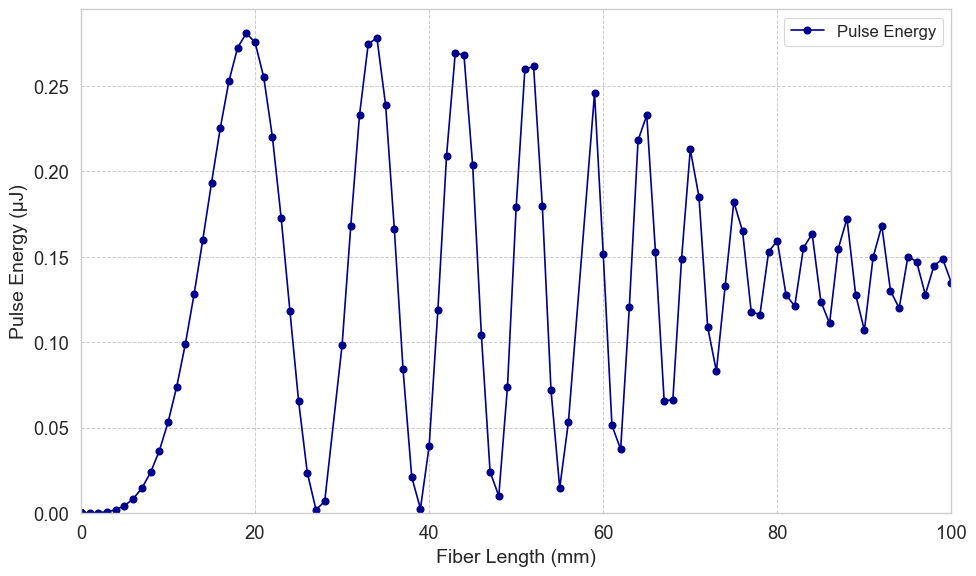

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named TH_pulse_dataframe_xenon

# Set the style and context for consistency
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# Step 1: Define a constant pressure/length ratio
ratio = TH_pulse_dataframe_xenon['gas pressure'].max() / TH_pulse_dataframe_xenon['fiber length'].max()

# Step 2: Extract data along this ratio
diagonal_data = TH_pulse_dataframe_xenon[
    (TH_pulse_dataframe_xenon['fiber length'] == 0) | 
    (TH_pulse_dataframe_xenon['gas pressure'] / TH_pulse_dataframe_xenon['fiber length'] == ratio)
]

# Step 3: Create a professional-looking plot for a scientific paper
plt.figure(figsize=(10, 6))

# Plot the data with a dark blue color
plt.plot(diagonal_data['fiber length'], diagonal_data['pulse energy']*1e6, 
         marker='o', linestyle='-', color='darkblue', label='Pulse Energy')

# Step 4: Add axis labels with appropriate units (Pulse Energy in µJ)
plt.xlabel('Fiber Length (mm)', fontsize=14)
plt.ylabel('Pulse Energy (µJ)', fontsize=14)

# Step 5: Set axis limits
plt.xlim([0, 100])  # Set x-axis limit to 0 to 100 mm
plt.ylim([0, None])  # Set y-axis lower limit just above 0 for better visibility

# Step 6: Gridlines and ticks customization
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Step 7: Add a legend
plt.legend(fontsize=12)

# Step 8: Tight layout to avoid overlaps
plt.tight_layout()

# Show the plot
plt.show()

### Fourth Harmonic:

In [242]:
FH_pulse_dataframe_xenon = pd.read_csv("1024_FH_pulse_dataframe_xenon.csv")

new_rows = []

# get the unique values of gases, pressures, and fiber lengths
gases = FH_pulse_dataframe_xenon['gas'].unique()
pressures = FH_pulse_dataframe_xenon['gas pressure'].unique()
fiber_lengths = FH_pulse_dataframe_xenon['fiber length'].unique()

# add rows for fiber length = 0
for gas in gases:
    for pressure in pressures:
        new_rows.append({
            "gas": gas,
            "gas pressure": pressure,
            "fiber length": 0,
            "pulse energy": 0,
            "pulse duration (FWHM)": 0,
            "pulse peak power": 0,
            "energy conversion efficiency": 0,
            "peak power conversion efficiency": 0
        })

# add rows for gas pressure = 0
for gas in gases:
    for fiber_length in fiber_lengths:
        new_rows.append({
            "gas": gas,
            "gas pressure": 0,  # Set pressure to 0
            "fiber length": fiber_length,
            "pulse energy": 0,  # Set signal to 0
            "pulse duration (FWHM)": 0,
            "pulse peak power": 0,
            "energy conversion efficiency": 0,
            "peak power conversion efficiency": 0
        })

new_rows_df = pd.DataFrame(new_rows)
FH_pulse_dataframe_xenon = pd.concat([new_rows_df, FH_pulse_dataframe_xenon], ignore_index=True, sort=False)
heatmap_FH_energy_xenon = FH_pulse_dataframe_xenon.pivot(index='gas pressure', columns='fiber length', values='pulse energy')

/var/folders/sj/b_4kbpj13tg_dm_f9vjc5sr80000gn/T/ipykernel_31696/942365297.py:32: RuntimeWarning: divide by zero encountered in divide
  y = product_pressure_length / x


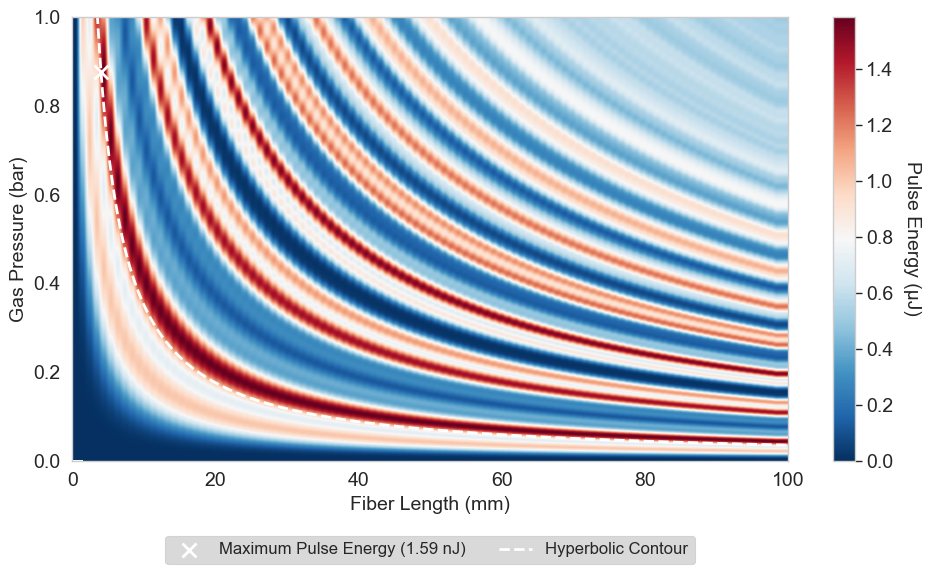

In [243]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# find the maximum pulse energy and its corresponding gas pressure and fiber length
max_pulse_energy = FH_pulse_dataframe_xenon['pulse energy'].max()
max_row = FH_pulse_dataframe_xenon[FH_pulse_dataframe_xenon['pulse energy'] == max_pulse_energy]

max_gas_pressure = max_row['gas pressure'].values[0]
max_fiber_length = max_row['fiber length'].values[0]

# calculate the product of gas pressure and fiber length
product_pressure_length = max_gas_pressure * max_fiber_length

plt.figure(figsize=(10, 6))

# multiply the heatmap data by 1e6 to convert to nJ
heatmap_scaled = heatmap_FH_energy_xenon * 1e9

plt.imshow(heatmap_scaled, aspect='auto', cmap='RdBu_r', origin='lower', 
           extent=[FH_pulse_dataframe_xenon['fiber length'].min(), 
                   FH_pulse_dataframe_xenon['fiber length'].max(), 
                   FH_pulse_dataframe_xenon['gas pressure'].min(), 
                   FH_pulse_dataframe_xenon['gas pressure'].max()])

cbar = plt.colorbar(label='Pulse Energy (µJ)', orientation='vertical')
cbar.set_label('Pulse Energy (µJ)', fontsize=14, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=14)

plt.scatter(max_fiber_length, max_gas_pressure, color='white', marker='x', s=100, linewidths=2, label=f'Maximum Pulse Energy ({max_pulse_energy*1e9:.2f} nJ)', zorder=10)

x = np.linspace(0, 100, 500)
y = product_pressure_length / x
plt.plot(x, y, color='white', linewidth=2, linestyle='--', label='Hyperbolic Contour')

plt.xlabel('Fiber Length (mm)', fontsize=14)
plt.ylabel('Gas Pressure (bar)', fontsize=14)
plt.xlim(0, 100)
plt.ylim(0, FH_pulse_dataframe_xenon['gas pressure'].max())
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

legend = plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
legend.get_frame().set_facecolor('#d0d0d0')

plt.grid(False)
plt.tight_layout()
plt.savefig("fig18.png")

plt.show()

In [244]:
max_conversion_eta = max_row['energy conversion efficiency'].values[0]
max_conversion_eta * 100

0.0017588511238402372

In [245]:
max_pulse_energy * 1e6

0.0015851484230203115

In [246]:
max_gas_pressure

0.877

In [247]:
max_fiber_length

4

In [248]:
product_pressure_length

3.508

In [249]:
max_fwhm = max_row['pulse duration (FWHM)'].values[0]
max_fwhm * 1e12

0.09958699035644533

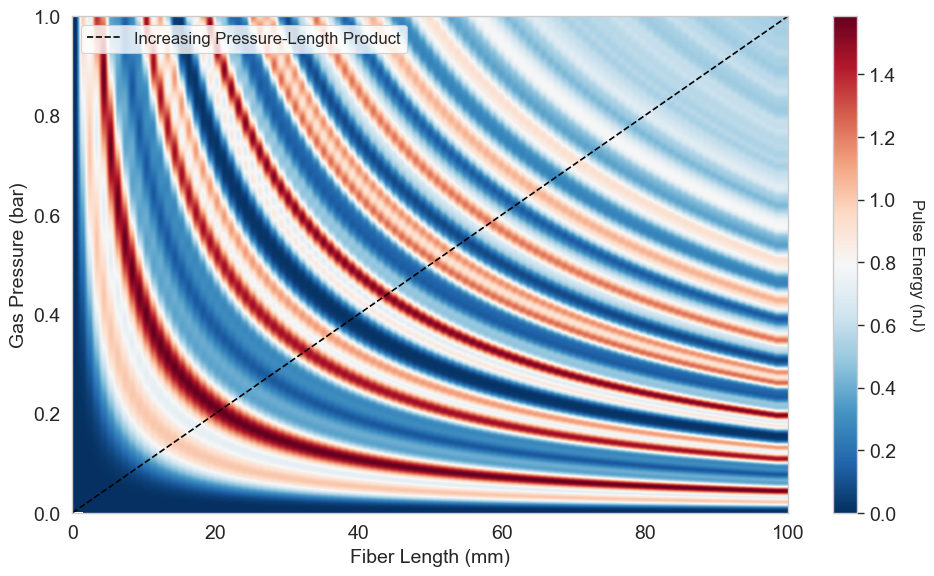

In [250]:
# define the constant pressure/length ratio
k = FH_pulse_dataframe_xenon['gas pressure'].max() / FH_pulse_dataframe_xenon['fiber length'].max()

heatmap_FH_energy_xenon = FH_pulse_dataframe_xenon.pivot(index='gas pressure', columns='fiber length', values='pulse energy')

# multiply the heatmap data by 1e6 to convert to µJ
heatmap_FH_energy_xenon_scaled = heatmap_FH_energy_xenon * 1e9

plt.figure(figsize=(10, 6))
heatmap_plot = plt.imshow(heatmap_FH_energy_xenon_scaled, aspect='auto', origin='lower', 
                          extent=[FH_pulse_dataframe_xenon['fiber length'].min(), 
                                  FH_pulse_dataframe_xenon['fiber length'].max(), 
                                  FH_pulse_dataframe_xenon['gas pressure'].min(), 
                                  FH_pulse_dataframe_xenon['gas pressure'].max()],
                          cmap='RdBu_r', norm=plt.Normalize(vmin=heatmap_FH_energy_xenon_scaled.min().min(), vmax=heatmap_FH_energy_xenon_scaled.max().max()))

product_values = np.linspace(
    FH_pulse_dataframe_xenon['gas pressure'].min() * FH_pulse_dataframe_xenon['fiber length'].min(),
    FH_pulse_dataframe_xenon['gas pressure'].max() * FH_pulse_dataframe_xenon['fiber length'].max(),
    100
)
fiber_lengths_product = np.sqrt(product_values / k)
pressures_product = np.sqrt(product_values * k)

plt.plot(fiber_lengths_product, pressures_product, 'k--', label='Increasing Pressure-Length Product')

plt.xlabel('Fiber Length (mm)', fontsize=14)
plt.ylabel('Gas Pressure (bar)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

cbar = plt.colorbar(heatmap_plot)
cbar.set_label('Pulse Energy (nJ)', fontsize=12, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=14)

plt.legend(fontsize=12)

plt.tight_layout()
plt.grid(False)

plt.savefig("fig19a.png")

plt.show()

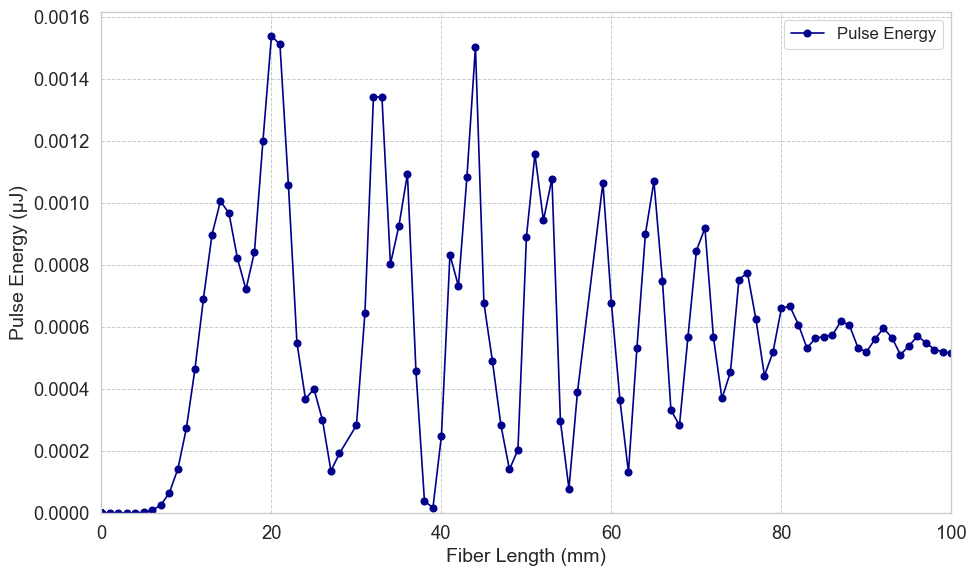

In [170]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# define a constant pressure/length ratio
ratio = FH_pulse_dataframe_xenon['gas pressure'].max() / FH_pulse_dataframe_xenon['fiber length'].max()

diagonal_data = FH_pulse_dataframe_xenon[
    (FH_pulse_dataframe_xenon['fiber length'] == 0) | 
    (FH_pulse_dataframe_xenon['gas pressure'] / FH_pulse_dataframe_xenon['fiber length'] == ratio)
]

plt.figure(figsize=(10, 6))

plt.plot(diagonal_data['fiber length'], diagonal_data['pulse energy']*1e6, 
         marker='o', linestyle='-', color='darkblue', label='Pulse Energy')

plt.xlabel('Fiber Length (mm)', fontsize=14)
plt.ylabel('Pulse Energy (µJ)', fontsize=14)

plt.xlim([0, 100])
plt.ylim([0, None])

plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

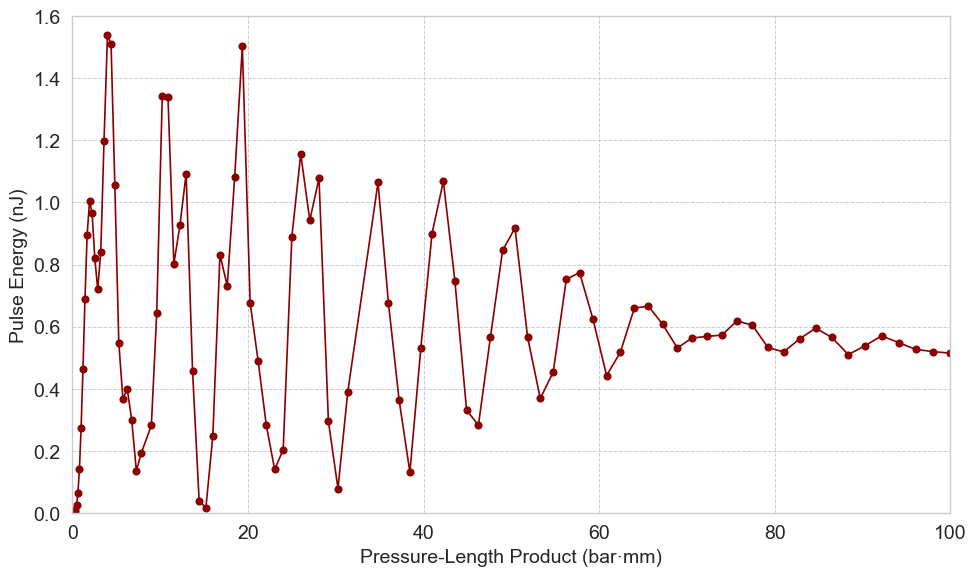

In [252]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# define a constant pressure/length ratio
ratio = FH_pulse_dataframe_xenon['gas pressure'].max() / FH_pulse_dataframe_xenon['fiber length'].max()

FH_pulse_dataframe_xenon['pressure_length_product'] = FH_pulse_dataframe_xenon['gas pressure'] * FH_pulse_dataframe_xenon['fiber length']

diagonal_data = FH_pulse_dataframe_xenon[(FH_pulse_dataframe_xenon['fiber length'] == 0) | 
                                         (FH_pulse_dataframe_xenon['gas pressure'] / FH_pulse_dataframe_xenon['fiber length'] == ratio)]

plt.figure(figsize=(10, 6))
plt.plot(diagonal_data['pressure_length_product'], diagonal_data['pulse energy'] * 1e9, 
         marker='o', linestyle='-', color='darkred')

plt.xlabel('Pressure-Length Product (bar·mm)', fontsize=14)
plt.ylabel('Pulse Energy (nJ)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim([0, 100])
plt.ylim([0, 1.6])

plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.tight_layout()

plt.savefig("fig19b.png")

plt.show()

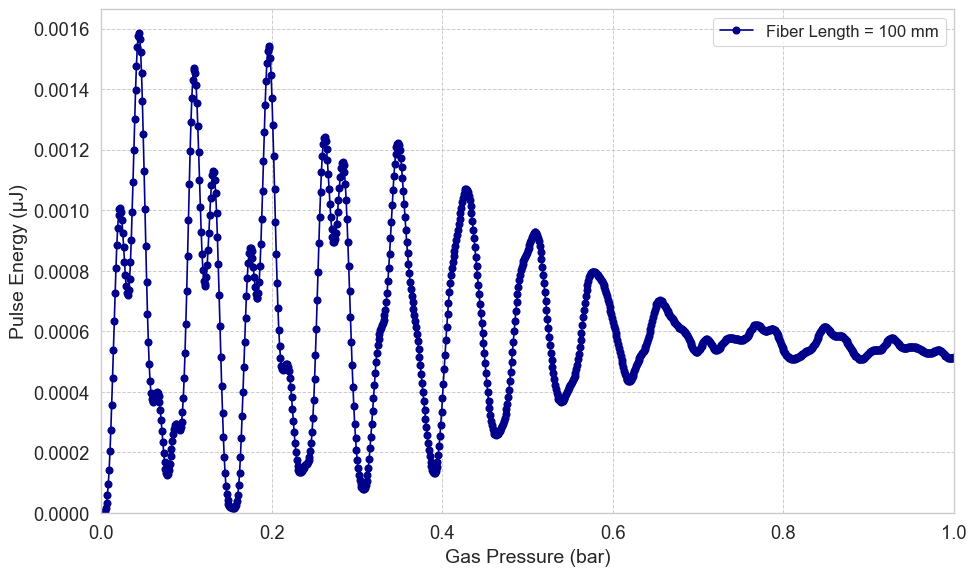

In [172]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# filter data for the specific fiber length
fiber_length_value = 100
filtered_data = FH_pulse_dataframe_xenon[FH_pulse_dataframe_xenon['fiber length'] == fiber_length_value]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['gas pressure'], filtered_data['pulse energy'] * 1e6, 
         marker='o', linestyle='-', color='darkblue', label=f'Fiber Length = {fiber_length_value} mm')

plt.xlabel('Gas Pressure (bar)', fontsize=14)
plt.ylabel('Pulse Energy (µJ)', fontsize=14)

# Step 4: Add grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.xlim([0, 1])
plt.ylim([0, None])

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

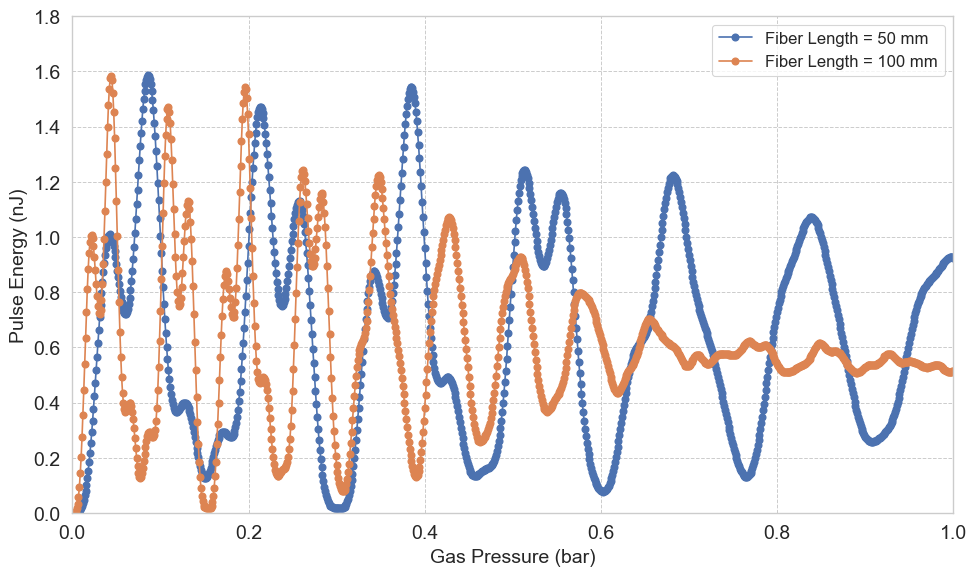

In [260]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

fiber_lengths = [50, 100]

colors = sns.color_palette("deep", len(fiber_lengths))

plt.figure(figsize=(10, 6))
for i, fiber_length_value in enumerate(fiber_lengths):
    filtered_data = FH_pulse_dataframe_xenon[FH_pulse_dataframe_xenon['fiber length'] == fiber_length_value]
    plt.plot(filtered_data['gas pressure'], filtered_data['pulse energy'] * 1e9, 
             marker='o', linestyle='-', color=colors[i], 
             label=f'Fiber Length = {fiber_length_value} mm')

plt.xlabel('Gas Pressure (bar)', fontsize=14)
plt.ylabel('Pulse Energy (nJ)', fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlim([0, 1])
plt.ylim([0, 1.8])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig("fig20.png")

plt.show()